# 1. 데이터 불러오기

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sulianova/cardiovascular-disease-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cardiovascular-disease-dataset


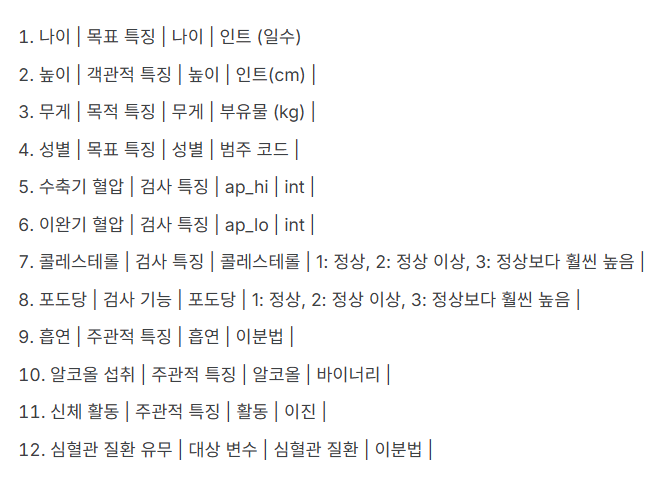

In [ ]:
import pandas as pd
import os

# 전체 경로 지정
csv_path = os.path.join(path, "cardio_train.csv")

# 데이터 불러오기
df = pd.read_csv(csv_path, sep=';')
print(df.head())

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
#cardio 0,1 비율확인
#불균형시 다른 처리 필요할 수 있음]
#해당 데이터는 거의 5;5로 균형잡힌 데이터

print(df['cardio'].value_counts())
print(df['cardio'].value_counts(normalize=True))

cardio
0    35021
1    34979
Name: count, dtype: int64
cardio
0    0.5003
1    0.4997
Name: proportion, dtype: float64


#2. 전처리

In [ ]:
#1. 결측치는 이미 없어서 생략
#2. 이상치 처리
#나이가 일수로 되어있어 년수로 바꿈
df['age'] = (df['age'] / 365).astype(int)
df['age']

,age
0,50
1,55
2,51
3,48
4,47
...,...
69995,52
69996,61
69997,52
69998,61


In [ ]:
#혈압 너무 높거나 작으면 이상치이니 정상범주만 셀렉
df = df[(df['ap_hi'] > 50) & (df['ap_hi'] < 250)]
df = df[(df['ap_lo'] > 30) & (df['ap_lo'] < 200)]

In [ ]:
#비현실적인 키/몸무게 제거
df = df[(df['height'] > 100) & (df['height'] < 250)]
df = df[(df['weight'] > 30) & (df['weight'] < 250)]

In [ ]:
# BMI 파생 변수 추가
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)

In [ ]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [ ]:
#카테고리형 변수 정리
#cholesterol, gluc (1:정상, 2:높음, 3:매우 높음)
#smoke, alco, active, gender (이진값)
#범주형 변수라면 원핫 인코딩(One-Hot Encoding)이나 레이블 인코딩이 필요

df = pd.get_dummies(df, columns=['cholesterol', 'gluc'], drop_first=True)

In [ ]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,BMI,cholesterol_2,cholesterol_3,gluc_2,gluc_3
0,0,50,2,168,62.0,110,80,0,0,1,0,21.967120,False,False,False,False
1,1,55,1,156,85.0,140,90,0,0,1,1,34.927679,False,True,False,False
2,2,51,1,165,64.0,130,70,0,0,0,1,23.507805,False,True,False,False
3,3,48,2,169,82.0,150,100,0,0,1,1,28.710479,False,False,False,False
4,4,47,1,156,56.0,100,60,0,0,0,0,23.011177,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,0,1,0,26.927438,False,False,False,False
69996,99995,61,1,158,126.0,140,90,0,0,1,1,50.472681,True,False,True,False
69997,99996,52,2,183,105.0,180,90,0,1,0,1,31.353579,False,True,False,False
69998,99998,61,1,163,72.0,135,80,0,0,0,1,27.099251,False,False,True,False


# 3. 로지스틱 회귀 모델링

In [ ]:
#필요 라이브러리 이미 불러옴

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#타켓 변수 y, 입력 변수 x 분리

X = df.drop('cardio', axis=1)
y = df['cardio']

In [ ]:
#훈련 데이터와 테스트용 데이터 분리

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#스케일링 -> 정규화: StandardScaler는 변수들을 평균 0, 표준편차 1로 바꾸어 학습 안정성 높임.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#로지스틱 회귀 모델 학습'
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
#예측 및 성능 평가
y_pred = model.predict(X_test_scaled)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6944
           1       0.76      0.67      0.71      6804

    accuracy                           0.73     13748
   macro avg       0.74      0.73      0.73     13748
weighted avg       0.73      0.73      0.73     13748



아무 처리 안 한 로지스틱 회귀모델의 정확도는 0.76(1기준으로 봄)

In [ ]:
#중요 특성 확인
feature_names = X.columns
coefficients = model.coef_[0]

# 중요 변수 정렬해서 보기
importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\n중요한 피처 상위 10개:")
print(importance.head(10))


중요한 피처 상위 10개:
          Feature  Coefficient
5           ap_hi     0.885378
12  cholesterol_3     0.346489
1             age     0.340799
4          weight     0.220333
6           ap_lo     0.166830
11  cholesterol_2     0.131896
14         gluc_3    -0.095090
9          active    -0.087511
3          height    -0.072837
10            BMI    -0.066073


심혈관 질환 발병에 가장 큰 영향을 주는 변수는 ap_hi(수축기 혈압), 콜레스테롤이 매우 높은 경우, 나이 였음.

# 랜덤 포레스트 모델링

In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:

# 2. 특성/타겟 지정
X = df.drop(['id', 'cardio'], axis=1)
y = df['cardio']

# 3. 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='accuracy')
rf_grid.fit(X_train, y_train)

print("Random Forest 최적 파라미터:", rf_grid.best_params_)
rf_pred = rf_grid.predict(X_test)
print("정확도:", accuracy_score(y_test, rf_pred))
print("분류 리포트:\n", classification_report(y_test, rf_pred))

Random Forest 최적 파라미터: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
정확도: 0.7394285714285714
분류 리포트:
               precision    recall  f1-score   support

           0       0.72      0.79      0.75      6988
           1       0.77      0.69      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



# XG boost 모델링

In [ ]:
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

xgb_grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                        xgb_params, cv=3, scoring='accuracy')
xgb_grid.fit(X_train, y_train)

print("XGBoost 최적 파라미터:", xgb_grid.best_params_)
xgb_pred = xgb_grid.predict(X_test)
print("정확도:", accuracy_score(y_test, xgb_pred))
print("분류 리포트:\n", classification_report(y_test, xgb_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:32:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:32:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:32:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:32:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:32:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost 최적 파라미터: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
정확도: 0.7387857142857143
분류 리포트:
               precision    recall  f1-score   support

           0       0.72      0.77      0.75      6988
           1       0.76      0.70      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



# light gbm 모델링

In [ ]:
lgbm_params = {
    'n_estimators': [100, 200],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1],
    'num_leaves': [31, 50],
    'subsample': [0.8, 1.0]
}

lgbm_grid = GridSearchCV(LGBMClassifier(random_state=42), lgbm_params, cv=3, scoring='accuracy')
lgbm_grid.fit(X_train, y_train)

print("LightGBM 최적 파라미터:", lgbm_grid.best_params_)
lgbm_pred = lgbm_grid.predict(X_test)
print("정확도:", accuracy_score(y_test, lgbm_pred))
print("분류 리포트:\n", classification_report(y_test, lgbm_pred))

[LightGBM] [Info] Number of positive: 18144, number of negative: 18514
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004875 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 908
[LightGBM] [Info] Number of data points in the train set: 36658, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494953 -> initscore=-0.020187
[LightGBM] [Info] Start training from score -0.020187
[LightGBM] [Info] Number of positive: 18144, number of negative: 18515
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 909
[LightGBM] [Info] Number of data points in the train set: 36659, number of used features: 15
[LightGBM] [Info] [b

# 랜덤서치, 앙상블

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
import numpy as np

In [ ]:
# 랜덤 포레스트 튜닝
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_random = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                               rf_params, n_iter=30, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)
rf_best = rf_random.best_estimator_

# XGBoost 튜닝
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
xgb_random = RandomizedSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                                xgb_params, n_iter=30, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)
xgb_random.fit(X_train, y_train)
xgb_best = xgb_random.best_estimator_

# LightGBM 튜닝
lgbm_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 70]
}
lgbm_random = RandomizedSearchCV(LGBMClassifier(random_state=42),
                                 lgbm_params, n_iter=30, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)
lgbm_random.fit(X_train, y_train)
lgbm_best = lgbm_random.best_estimator_

KeyboardInterrupt: 

In [ ]:
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_best),
        ('xgb', xgb_best),
        ('lgbm', lgbm_best)
    ],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# 예측
y_pred = voting_clf.predict(X_test)
y_proba = voting_clf.predict_proba(X_test)[:, 1]

# 평가 지표
print("정확도:", accuracy_score(y_test, y_pred))
print("F1-score:", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("혼동 행렬:\n", confusion_matrix(y_test, y_pred))

# ROC 곡선
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='VotingClassifier')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# 딥러닝 mlp

In [ ]:
#텐서플로우 기반

In [ ]:
!pip install tensorflow scikit-learn

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_auc_score

# 1. 스케일링 (한 번 더 확인)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. 모델 정의
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(2, activation='softmax')  # 이진분류일 때 softmax(2) or sigmoid(1)
])

# 3. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # y가 정수일 경우 sparse 사용
              metrics=['accuracy'])

# 4. 학습
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=64,
                    validation_split=0.2, verbose=1)

# 5. 예측
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

# 6. 평가 지표
print("정확도:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_prob[:, 1]))
print("classification report:\n", classification_report(y_test, y_pred))
print("혼동행렬:\n", confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
700/700 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6362 - loss: 0.6411 - val_accuracy: 0.7133 - val_loss: 0.5788
Epoch 2/30
700/700 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7004 - loss: 0.5969 - val_accuracy: 0.7295 - val_loss: 0.5582
Epoch 3/30
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7201 - loss: 0.5658 - val_accuracy: 0.7335 - val_loss: 0.5495
Epoch 4/30
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7225 - loss: 0.5670 - val_accuracy: 0.7346 - val_loss: 0.5472
Epoch 5/30
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7242 - loss: 0.5587 - val_accuracy: 0.7341 - val_loss: 0.5455
Epoch 6/30
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7284 - loss: 0.5534 - val_accuracy: 0.7369 - val_loss: 0.5418
Epoch 7/30
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7296 - loss: 0.5492 - val_accuracy: 0.7350 - val_loss: 0.5450
Epoch 8/30
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7295 - loss: 0.5531 - val_accuracy: 0.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_ckpt = ModelCheckpoint('best_model.h5', save_best_only=True)

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stop, model_ckpt])

Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7353 - loss: 0.5438

700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7353 - loss: 0.5438 - val_accuracy: 0.7366 - val_loss: 0.5398
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7370 - loss: 0.5416 - val_accuracy: 0.7358 - val_loss: 0.5412
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7309 - loss: 0.5460 - val_accuracy: 0.7362 - val_loss: 0.5405
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7347 - loss: 0.5457 - val_accuracy: 0.7352 - val_loss: 0.5417
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7303 - loss: 0.5468 - val_accuracy: 0.7357 - val_loss: 0.5411
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7376 - loss: 0.5394 - val_accuracy: 0.7376 - val_loss: 0.5412


In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score

# 1. 저장된 최적 모델 불러오기
best_model = load_model('best_model.h5')

# 2. 테스트 데이터로 예측
y_pred_prob = best_model.predict(X_test_scaled)
y_pred = y_pred_prob.argmax(axis=1)

# 3. 정확도 출력
print("✅ 정확도:", accuracy_score(y_test, y_pred))

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
✅ 정확도: 0.7412857142857143


# TabNet 기반 전이학습

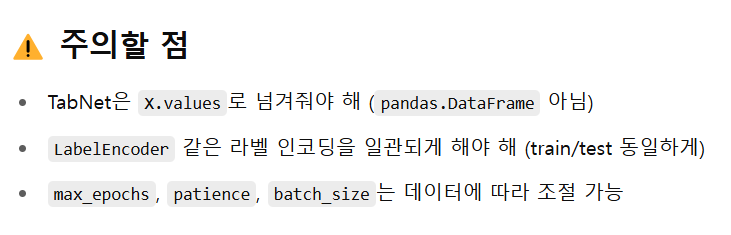

In [ ]:
pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import os

# 전체 경로 지정
csv_path = os.path.join(path, "cardio_train.csv")

# 데이터 불러오기
df = pd.read_csv(csv_path, sep=';')
print(df.head())

# 필요한 전처리 예시 (본인 상황에 맞게 조절)
df = df.drop(columns=["id"])
df["age"] = df["age"] / 365  # 나이를 일수에서 년으로 변환

# 특성과 라벨 분리
X = df.drop("cardio", axis=1)
y = df["cardio"]

# 인코딩
le = LabelEncoder()
y = le.fit_transform(y)

# 훈련/검증용 분리
prev_X_train, prev_X_test, prev_y_train, prev_y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
import numpy as np

clf_pretrain = TabNetClassifier()

clf_pretrain.fit(
    X_train=prev_X_train.values,
    y_train=prev_y_train,
    eval_set=[(prev_X_test.values, prev_y_test)],
    eval_metric=['accuracy'],
    max_epochs=20,
    patience=5,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0
)

# 모델 저장
clf_pretrain.save_model("pretrained_tabnet")

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.62293 | val_0_accuracy: 0.501   |  0:00:04s
epoch 1  | loss: 0.56774 | val_0_accuracy: 0.50414 |  0:00:07s
epoch 2  | loss: 0.56021 | val_0_accuracy: 0.56564 |  0:00:10s
epoch 3  | loss: 0.55765 | val_0_accuracy: 0.58207 |  0:00:19s
epoch 4  | loss: 0.55447 | val_0_accuracy: 0.68814 |  0:00:24s
epoch 5  | loss: 0.55254 | val_0_accuracy: 0.69686 |  0:00:27s
epoch 6  | loss: 0.55233 | val_0_accuracy: 0.70064 |  0:00:33s
epoch 7  | loss: 0.55057 | val_0_accuracy: 0.69114 |  0:00:36s
epoch 8  | loss: 0.55037 | val_0_accuracy: 0.70607 |  0:00:39s
epoch 9  | loss: 0.55332 | val_0_accuracy: 0.68529 |  0:00:43s
epoch 10 | loss: 0.55377 | val_0_accuracy: 0.675   |  0:00:47s
epoch 11 | loss: 0.55048 | val_0_accuracy: 0.682   |  0:00:50s
epoch 12 | loss: 0.54914 | val_0_accuracy: 0.66929 |  0:00:54s
epoch 13 | loss: 0.54853 | val_0_accuracy: 0.6825  |  0:00:57s

Early stopping occurred at epoch 13 with best_epoch = 8 and best_val_0_accuracy = 0.70607


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Successfully saved model at pretrained_tabnet.zip


'pretrained_tabnet.zip'

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dileep070/heart-disease-prediction-using-logistic-regression")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/heart-disease-prediction-using-logistic-regression


In [ ]:
import os

# 데이터 디렉토리 내 파일 리스트 확인
files = os.listdir(path)
print("Files in dataset folder:", files)

Files in dataset folder: ['framingham.csv']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import joblib  # 모델 저장 및 불러오기

In [ ]:
import pandas as pd
import os

# framingham.csv 경로 설정
csv_path = os.path.join(path, "framingham.csv")

# 데이터 불러오기
f_df = pd.read_csv(csv_path)

# 첫 5행 미리 보기
print(f_df)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

In [ ]:
# 결측치 제거
f_df.dropna(inplace=True)

# 특성과 타겟 설정
X = f_df.drop(columns=["TenYearCHD"])
y = f_df["TenYearCHD"]

# 데이터 분할
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 데이터 요약 정보
print(f_df.info())

# 결측값 확인
print(f_df.isnull().sum())

# 통계 요약
print(f_df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB
None
male         

In [ ]:
# 타깃 분포 확인
print(f_df['TenYearCHD'].value_counts())

TenYearCHD
0    3099
1     557
Name: count, dtype: int64


In [ ]:
# 1. 새로운 모델 객체 생성
clf_finetune = TabNetClassifier()

# 2. 저장된 모델 불러오기 (.zip 포함!)
clf_finetune.load_model("pretrained_tabnet.zip")

# 3. 새로운 데이터로 fine-tuning
clf_finetune.fit(
    X_train=new_X_train.values,
    y_train=new_y_train,
    eval_set=[(new_X_test.values, new_y_test)],
    eval_metric=['accuracy'],
    max_epochs=10,
    patience=3,
    batch_size=1024,
    virtual_batch_size=128
)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.7653  | val_0_accuracy: 0.55328 |  0:00:00s
epoch 1  | loss: 0.55639 | val_0_accuracy: 0.47131 |  0:00:00s
epoch 2  | loss: 0.50056 | val_0_accuracy: 0.6612  |  0:00:00s
epoch 3  | loss: 0.44687 | val_0_accuracy: 0.72951 |  0:00:00s
epoch 4  | loss: 0.44419 | val_0_accuracy: 0.56011 |  0:00:00s
epoch 5  | loss: 0.43526 | val_0_accuracy: 0.62432 |  0:00:00s
epoch 6  | loss: 0.4117  | val_0_accuracy: 0.34426 |  0:00:00s

Early stopping occurred at epoch 6 with best_epoch = 3 and best_val_0_accuracy = 0.72951


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
clf_finetune.save_model("tabnet_finetuned_model")

Successfully saved model at tabnet_finetuned_model.zip


'tabnet_finetuned_model.zip'

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 예측 수행
y_pred = clf_finetune.predict(new_X_test.values)

# 정확도 확인
print("정확도:", accuracy_score(new_y_test, y_pred))

# 분류 리포트
print("분류 리포트:\n", classification_report(new_y_test, y_pred))

정확도: 0.7295081967213115
분류 리포트:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84       620
           1       0.14      0.15      0.15       112

    accuracy                           0.73       732
   macro avg       0.49      0.49      0.49       732
weighted avg       0.74      0.73      0.73       732



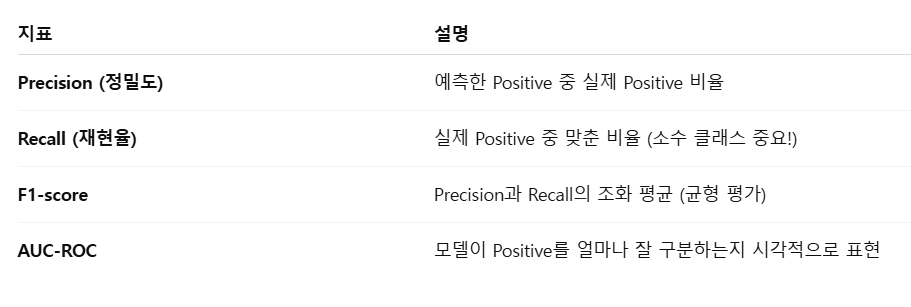

# smote

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

# SMOTE 인스턴스 생성
smote = SMOTE(random_state=42)

# 학습 데이터에 적용
X_train_smote, y_train_smote = smote.fit_resample(new_X_train, new_y_train)

# 결과 확인
print("SMOTE 전:", dict(pd.Series(new_y_train).value_counts()))
print("SMOTE 후:", dict(pd.Series(y_train_smote).value_counts()))

SMOTE 전: {0: np.int64(2479), 1: np.int64(445)}
SMOTE 후: {0: np.int64(2479), 1: np.int64(2479)}


In [ ]:
#SMOTE 데이터로 전이학습 모델 fine-tuning

In [ ]:
clf_finetune = TabNetClassifier()
clf_finetune.load_model("pretrained_tabnet.zip")

clf_finetune.fit(
    X_train=X_train_smote.values,
    y_train=y_train_smote,
    eval_set=[(new_X_test.values, new_y_test)],
    eval_metric=['accuracy'],
    max_epochs=20,
    patience=5,
    batch_size=1024,
    virtual_batch_size=128
)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.77011 | val_0_accuracy: 0.21448 |  0:00:00s
epoch 1  | loss: 0.65164 | val_0_accuracy: 0.1612  |  0:00:01s
epoch 2  | loss: 0.64237 | val_0_accuracy: 0.21858 |  0:00:02s
epoch 3  | loss: 0.63285 | val_0_accuracy: 0.20628 |  0:00:02s
epoch 4  | loss: 0.61273 | val_0_accuracy: 0.47131 |  0:00:03s
epoch 5  | loss: 0.61374 | val_0_accuracy: 0.53825 |  0:00:03s
epoch 6  | loss: 0.6073  | val_0_accuracy: 0.5765  |  0:00:04s
epoch 7  | loss: 0.60246 | val_0_accuracy: 0.60656 |  0:00:05s
epoch 8  | loss: 0.59822 | val_0_accuracy: 0.54372 |  0:00:05s
epoch 9  | loss: 0.60011 | val_0_accuracy: 0.47268 |  0:00:06s
epoch 10 | loss: 0.59932 | val_0_accuracy: 0.4153  |  0:00:06s
epoch 11 | loss: 0.59308 | val_0_accuracy: 0.36339 |  0:00:07s
epoch 12 | loss: 0.59041 | val_0_accuracy: 0.32514 |  0:00:08s

Early stopping occurred at epoch 12 with best_epoch = 7 and best_val_0_accuracy = 0.60656


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
# 예측 수행
y_pred = clf_finetune.predict(new_X_test.values)

# 정확도 확인
print("정확도:", accuracy_score(new_y_test, y_pred))

# 분류 리포트
print("분류 리포트:\n", classification_report(new_y_test, y_pred))

정확도: 0.6065573770491803
분류 리포트:
               precision    recall  f1-score   support

           0       0.86      0.64      0.73       620
           1       0.18      0.43      0.25       112

    accuracy                           0.61       732
   macro avg       0.52      0.53      0.49       732
weighted avg       0.76      0.61      0.66       732



In [ ]:
#recall 상승 → 질병 환자를 더 잘 찾아냄 (SMOTE가 의도한 방향)

In [ ]:
#개선 사항: 전이학습 fine-tuning 시 더 오랜 학습이나 작은 learning rate가 필요할 수 있음, 정확도 대신 AUC-ROC나 PR Curve를 사용

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier

# TabNetClassifier 객체 생성 시 learning_rate 설정 필요
clf_finetune = TabNetClassifier(
     optimizer_params=dict(lr=1e-3),
    seed=42
)

# 전이학습 모델 로드
clf_finetune.load_model("pretrained_tabnet.zip")

# fine-tuning 진행
clf_finetune.fit(
    X_train=X_train_smote.values,
    y_train=y_train_smote,
    eval_set=[(new_X_test.values, new_y_test)],
    max_epochs=10,
    patience=10,
    batch_size=512,
    virtual_batch_size=128,
    eval_metric=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.71493 | val_0_accuracy: 0.25273 |  0:00:01s
epoch 1  | loss: 0.64395 | val_0_accuracy: 0.19262 |  0:00:01s
epoch 2  | loss: 0.62351 | val_0_accuracy: 0.35246 |  0:00:02s
epoch 3  | loss: 0.61055 | val_0_accuracy: 0.39617 |  0:00:03s
epoch 4  | loss: 0.60882 | val_0_accuracy: 0.36885 |  0:00:03s
epoch 5  | loss: 0.60616 | val_0_accuracy: 0.49454 |  0:00:04s
epoch 6  | loss: 0.5972  | val_0_accuracy: 0.22678 |  0:00:04s
epoch 7  | loss: 0.5984  | val_0_accuracy: 0.20765 |  0:00:04s
epoch 8  | loss: 0.58867 | val_0_accuracy: 0.19262 |  0:00:05s
epoch 9  | loss: 0.58713 | val_0_accuracy: 0.15847 |  0:00:05s
Stop training because you reached max_epochs = 10 with best_epoch = 5 and best_val_0_accuracy = 0.49454


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
# 예측 수행
y_pred = clf_finetune.predict(new_X_test.values)

# 정확도 확인
print("정확도:", accuracy_score(new_y_test, y_pred))

# 분류 리포트
print("분류 리포트:\n", classification_report(new_y_test, y_pred))

정확도: 0.49453551912568305
분류 리포트:
               precision    recall  f1-score   support

           0       0.86      0.48      0.62       620
           1       0.16      0.55      0.25       112

    accuracy                           0.49       732
   macro avg       0.51      0.52      0.43       732
weighted avg       0.75      0.49      0.56       732



In [ ]:
# **SMOTETomek이나 SMOTEENN**을 사용하여 노이즈 샘플 제거 병행 필요
#max_epochs를 너무 많이 주면 모델이 기존 학습 내용을 과잉 덮어씀 (catastrophic forgetting)

# 전이학습 활용방안

목표: 인터랙티브 건강 예측 & 개선 가이드 시스템

입력값을 통해 현재와 10년 후 심혈관 질환 발병 확률 예측

발병 확률을 낮추기 위해 어떤 항목을 개선해야 하는지 제안

구체적으로 얼마까지 수치를 낮춰야 하는지 목표값 제시

코랩에서 작동 가능한 UI 또는 코드 구조

In [ ]:
!pip install kagglehub pytorch-tabnet

import kagglehub
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from lightgbm import LGBMClassifier

from pytorch_tabnet.tab_model import TabNetClassifier
import ipywidgets as widgets
from IPython.display import display, clear_output


In [ ]:
# 1. 첫 번째 데이터셋 로드 및 전처리 (cardio_train.csv)
path = kagglehub.dataset_download("sulianova/cardiovascular-disease-dataset")
csv_path = os.path.join(path, "cardio_train.csv")
df = pd.read_csv(csv_path, sep=';')

df['age'] = (df['age'] / 365).astype(int)
df = df[(df['ap_hi'] > 50) & (df['ap_hi'] < 250)]
df = df[(df['ap_lo'] > 30) & (df['ap_lo'] < 200)]
df = df[(df['height'] > 100) & (df['height'] < 250)]
df = df[(df['weight'] > 30) & (df['weight'] < 250)]

df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)
df = pd.get_dummies(df, columns=['cholesterol', 'gluc'], drop_first=True)

X = df.drop(['cardio', 'id'], axis=1)
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 2. 로지스틱 회귀 모델
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)

# 3. LightGBM 하이퍼파라미터 튜닝
lgbm_params = {
    'n_estimators': [100, 200],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1],
    'num_leaves': [31, 50],
    'subsample': [0.8, 1.0]
}

lgbm_grid = GridSearchCV(LGBMClassifier(random_state=42), lgbm_params, cv=3, scoring='accuracy')
lgbm_grid.fit(X_train, y_train)

print("LightGBM 최적 파라미터:", lgbm_grid.best_params_)
lgbm_pred = lgbm_grid.predict(X_test)
print("정확도:", accuracy_score(y_test, lgbm_pred))
print("분류 리포트:\n", classification_report(y_test, lgbm_pred))

[LightGBM] [Info] Number of positive: 18144, number of negative: 18514
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 653
[LightGBM] [Info] Number of data points in the train set: 36658, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494953 -> initscore=-0.020187
[LightGBM] [Info] Start training from score -0.020187
[LightGBM] [Info] Number of positive: 18144, number of negative: 18515
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 654
[LightGBM] [Info] Number of data points in the train set: 36659, number of used features: 14
[LightGBM] [Info] [b

In [ ]:
# 4. TabNet 사전 학습 (cardio 데이터 사용)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from pytorch_tabnet.tab_model import TabNetClassifier
import numpy as np

# Step 1: Split
prev_X_train, prev_X_test, prev_y_train, prev_y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 2: Label Encoding
le = LabelEncoder()
prev_y_train_encoded = le.fit_transform(prev_y_train)
prev_y_test_encoded = le.transform(prev_y_test)

# Step 3: Ensure input arrays are float32
X_train_np = prev_X_train.values.astype(np.float32)
X_test_np = prev_X_test.values.astype(np.float32)
y_train_np = prev_y_train_encoded.astype(np.int64)
y_test_np = prev_y_test_encoded.astype(np.int64)

# Step 4: Fit TabNet
clf_pretrain = TabNetClassifier()
clf_pretrain.fit(
    X_train=X_train_np,
    y_train=y_train_np,
    eval_set=[(X_test_np, y_test_np)],
    eval_metric=['accuracy'],
    max_epochs=20,
    patience=5,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0
)

# Step 5: 저장
clf_pretrain.save_model("pretrained_tabnet")

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.59908 | val_0_accuracy: 0.49636 |  0:00:03s
epoch 1  | loss: 0.56379 | val_0_accuracy: 0.50095 |  0:00:07s
epoch 2  | loss: 0.56114 | val_0_accuracy: 0.51608 |  0:00:11s
epoch 3  | loss: 0.55982 | val_0_accuracy: 0.57186 |  0:00:15s
epoch 4  | loss: 0.55507 | val_0_accuracy: 0.65275 |  0:00:18s
epoch 5  | loss: 0.55237 | val_0_accuracy: 0.70665 |  0:00:21s
epoch 6  | loss: 0.55033 | val_0_accuracy: 0.71887 |  0:00:25s
epoch 7  | loss: 0.54989 | val_0_accuracy: 0.72665 |  0:00:29s
epoch 8  | loss: 0.55054 | val_0_accuracy: 0.72563 |  0:00:32s
epoch 9  | loss: 0.54954 | val_0_accuracy: 0.72585 |  0:00:35s
epoch 10 | loss: 0.54836 | val_0_accuracy: 0.72847 |  0:00:39s
epoch 11 | loss: 0.55011 | val_0_accuracy: 0.72992 |  0:00:42s
epoch 12 | loss: 0.55065 | val_0_accuracy: 0.72527 |  0:00:45s
epoch 13 | loss: 0.54963 | val_0_accuracy: 0.7268  |  0:00:49s
epoch 14 | loss: 0.54862 | val_0_accuracy: 0.73152 |  0:00:53s
epoch 15 | loss: 0.54733 | val_0_accuracy: 0.73007 |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Successfully saved model at pretrained_tabnet.zip


'pretrained_tabnet.zip'

In [ ]:
#예측 결과를 나중에 다시 문자로 보고 싶으면  le.inverse_transform(predictions)

In [ ]:
# 5. Framingham 데이터셋 로드 및 fine-tuning
path = kagglehub.dataset_download("dileep070/heart-disease-prediction-using-logistic-regression")
csv_path = os.path.join(path, "framingham.csv")
f_df = pd.read_csv(csv_path)
f_df.dropna(inplace=True)

new_X = f_df.drop(columns=["TenYearCHD"])
new_y = f_df["TenYearCHD"]

new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(
    new_X, new_y, test_size=0.2, random_state=42, stratify=new_y
)

In [ ]:
clf_finetune = TabNetClassifier()
clf_finetune.load_model("pretrained_tabnet.zip")
clf_finetune.fit(
    X_train=new_X_train.values,
    y_train=new_y_train,
    eval_set=[(new_X_test.values, new_y_test)],
    eval_metric=['accuracy'],
    max_epochs=10,
    patience=3,
    batch_size=1024,
    virtual_batch_size=128
)


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.7653  | val_0_accuracy: 0.55328 |  0:00:00s
epoch 1  | loss: 0.55639 | val_0_accuracy: 0.47131 |  0:00:00s
epoch 2  | loss: 0.50056 | val_0_accuracy: 0.6612  |  0:00:00s
epoch 3  | loss: 0.44687 | val_0_accuracy: 0.72951 |  0:00:01s
epoch 4  | loss: 0.44419 | val_0_accuracy: 0.56011 |  0:00:01s
epoch 5  | loss: 0.43526 | val_0_accuracy: 0.62432 |  0:00:02s
epoch 6  | loss: 0.4117  | val_0_accuracy: 0.34426 |  0:00:02s

Early stopping occurred at epoch 6 with best_epoch = 3 and best_val_0_accuracy = 0.72951


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
# 6. 사용자 입력 기반 예측 인터페이스 정의
out = widgets.Output()

def predict_and_suggest(age, ap_hi, ap_lo, height, weight,
                        cholesterol, gluc, smoke, alco, active, gender):
    out.clear_output()

    bmi = weight / ((height / 100) ** 2)

    # 학습 시 사용한 컬럼명과 순서대로 딕셔너리 만들기
    input_data = {
        'age': age,
        'gender': gender,
        'height': height,
        'weight': weight,
        'ap_hi': ap_hi,
        'ap_lo': ap_lo,
        'smoke': smoke,
        'alco': alco,
        'active': active,
        'BMI': bmi,
        'cholesterol_2': 1 if cholesterol == 2 else 0,
        'cholesterol_3': 1 if cholesterol == 3 else 0,
        'gluc_2': 1 if gluc == 2 else 0,
        'gluc_3': 1 if gluc == 3 else 0
    }

    # X.columns.tolist() : 학습 때 사용한 컬럼명과 순서 (14개여야 함)
    feature_cols = X.columns.tolist()

    # input_df 생성 및 컬럼 순서 맞추기
    input_df = pd.DataFrame([input_data])[feature_cols]

    # TabNet은 보통 스케일링 안 함 -> scaler.transform() 없이 원본 데이터 넣기
    input_values = input_df.values

    # 예측
    prob = clf_finetune.predict_proba(input_values)[0][1]

    suggestions = []
    targets = {}

    if ap_hi > 120:
        suggestions.append("수축기 혈압 낮추기")
        targets['ap_hi'] = 120

    if ap_lo > 80:
        suggestions.append("이완기 혈압 낮추기")
        targets['ap_lo'] = 80

    if bmi > 24.9:
        suggestions.append("BMI 줄이기 (체중 감량)")
        targets['BMI'] = 24.9

    if cholesterol > 1:
        suggestions.append("콜레스테롤 개선")
        targets['cholesterol'] = 1

    if gluc > 1:
        suggestions.append("혈당 개선")
        targets['gluc'] = 1

    if smoke == 1:
        suggestions.append("금연")

    if alco == 1:
        suggestions.append("음주 줄이기")

    if active == 0:
        suggestions.append("운동량 늘리기")

    with out:
        print(f"예측된 심혈관 질환 발병 확률: {prob*100:.2f}%")
        if suggestions:
            print("\n개선이 권장되는 항목:")
            for s in suggestions:
                print("-", s)
            print("\n개선 목표값:")
            for k, v in targets.items():
                print(f"  {k} : {v}")
        else:
            print("현재 위험 요인은 크게 없습니다. 꾸준히 건강 관리하세요!")

In [ ]:
# 사용자 입력용 위젯 설정
age_slider = IntSlider(value=50, min=20, max=90, description='나이(년):')
ap_hi_slider = IntSlider(value=120, min=70, max=200, description='수축기 혈압:')
ap_lo_slider = IntSlider(value=80, min=40, max=120, description='이완기 혈압:')
height_slider = IntSlider(value=170, min=140, max=210, description='키(cm):')
weight_slider = FloatSlider(value=70, min=40, max=150, step=0.1, description='몸무게(kg):')

cholesterol_dropdown = Dropdown(options=[1, 2, 3], value=1, description='콜레스테롤:')
gluc_dropdown = Dropdown(options=[1, 2, 3], value=1, description='혈당:')
smoke_dropdown = Dropdown(options=[0,1], value=0, description='흡연 여부:')
alco_dropdown = Dropdown(options=[0,1], value=0, description='음주 여부:')
active_dropdown = Dropdown(options=[0,1], value=1, description='활동 여부:')
gender_dropdown = Dropdown(options=[1,2], value=1, description='성별(1:남, 2:여):')

In [ ]:
# 예시 실행
predict_and_suggest(
    age=50, ap_hi=130, ap_lo=90, height=165, weight=75,
    cholesterol=2, gluc=1, smoke=0, alco=0, active=0, gender=1
)
display(out)

RuntimeError: running_mean should contain 14 elements not 15

In [ ]:
def predict_and_suggest(age, ap_hi, ap_lo, height, weight,
                        cholesterol, gluc, smoke, alco, active, gender):
    out.clear_output()
    # 입력값 DataFrame 생성 및 전처리
    input_df = pd.DataFrame({
        'age': [age],
        'ap_hi': [ap_hi],
        'ap_lo': [ap_lo],
        'height': [height],
        'weight': [weight],
        'cholesterol_2': [1 if cholesterol==2 else 0],
        'cholesterol_3': [1 if cholesterol==3 else 0],
        'gluc_2': [1 if gluc==2 else 0],
        'gluc_3': [1 if gluc==3 else 0],
        'smoke': [smoke],
        'alco': [alco],
        'active': [active],
        'gender': [gender]
    })

    # BMI 계산
    input_df['BMI'] = input_df['weight'] / ((input_df['height'] / 100) ** 2)

    # 입력 순서 맞추기 (모델 학습 때 컬럼 순서와 동일해야 함)
    feature_cols = ['age', 'ap_hi', 'ap_lo', 'height', 'weight',
                    'cholesterol_2', 'cholesterol_3', 'gluc_2', 'gluc_3',
                    'smoke', 'alco', 'active', 'gender', 'BMI']
    input_df = input_df[feature_cols]

    # 스케일링
    X_input_scaled = scaler.transform(input_df)

    # 발병 확률 예측
    prob = clf_finetune.predict_proba(X_input_scaled)[0][1]

In [ ]:
# 위험 요인 진단 및 개선 제안
    suggestions = []
    targets = {}
    if ap_hi > 120:
        suggestions.append("수축기 혈압 낮추기")
        targets['ap_hi'] = 120
    if ap_lo > 80:
        suggestions.append("이완기 혈압 낮추기")
        targets['ap_lo'] = 80
    if input_df['BMI'].values[0] > 24.9:
        suggestions.append("BMI 줄이기 (체중 감량)")
        targets['BMI'] = 24.9
    if cholesterol > 1:
        suggestions.append("콜레스테롤 개선")
        targets['cholesterol'] = 1
    if gluc > 1:
        suggestions.append("혈당 개선")
        targets['gluc'] = 1
    if smoke == 1:
        suggestions.append("금연")
    if alco == 1:
        suggestions.append("음주 줄이기")
    if active == 0:
        suggestions.append("운동량 늘리기")

    with out:
        print(f"예측된 심혈관 질환 발병 확률: {prob*100:.2f}%")
        if suggestions:
            print("개선이 권장되는 항목:")
            for s in suggestions:
                print("-", s)
            print("\n개선 목표값:")
            for k, v in targets.items():
                print(f"  {k} : {v}")
        else:
            print("현재 위험 요인은 크게 없습니다. 꾸준히 건강 관리하세요!")

IndentationError: unexpected indent (<ipython-input-95-01ba425e511b>, line 2)

In [ ]:
# 인터랙티브 UI 생성
ui = VBox([age_slider, ap_hi_slider, ap_lo_slider, height_slider, weight_slider,
           cholesterol_dropdown, gluc_dropdown, smoke_dropdown, alco_dropdown, active_dropdown, gender_dropdown])

button = Button(description="예측 및 개선안 보기")
button.on_click(lambda b: predict_and_suggest(
    age_slider.value, ap_hi_slider.value, ap_lo_slider.value,
    height_slider.value, weight_slider.value,
    cholesterol_dropdown.value, gluc_dropdown.value,
    smoke_dropdown.value, alco_dropdown.value,
    active_dropdown.value, gender_dropdown.value))

display(ui, button, out)